Exercises from Chapter 1 of  Shonkwiler, R.W., Mendivil, F. (2009). Explorations in Monte Carlo methods. Springer.

(Random walk with drift) Use a biased coin to simulate a random walk of 30 steps on the line. If the coin falls heads (H), take one step to the right, if it lands tails (T ), take one step left. After 30 steps, note the final position. Take Pr(H)=0.6 and Pr(T )=0.4. (a) Plot a sample path. (b) Make a histogram for 200 such random walks. (c) Report the sample mean. (d) Report the sample variance. (What should these be exactly?)

In [12]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def walk_drift(n = 30, p_h = 0.6):
    curr_pos = 0
    pos_list = [0]
    for i in range(n):
            if rd.random() < p_h: curr_pos +=1
            else: curr_pos -= 1
            pos_list.append(curr_pos)
    return pos_list

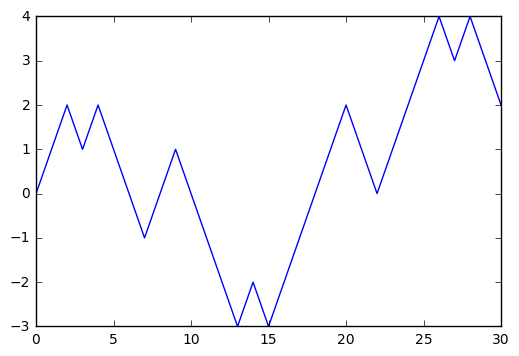

In [10]:
plt.plot(walk_drift())
plt.show()

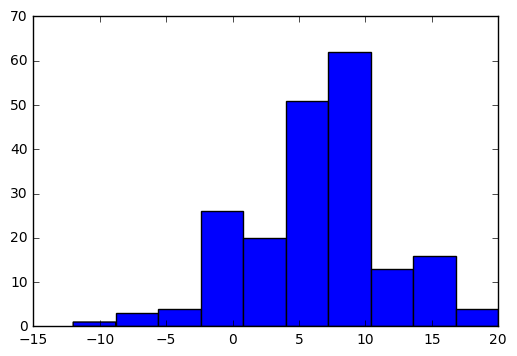

In [11]:
#plot final positions for 200 random walks
final_positions = [walk_drift()[-1] for _ in range(200)]
plt.hist(final_positions)
plt.show()

In [13]:
print "mean: ", np.mean(final_positions)
print "variance: ", np.var(final_positions)

mean:  6.24
variance:  29.5024


Exact values: 

M = 30(1(0.6) - 1(0.4)) = 30(0.2) = 6

V = $\sum (X - M)^2p(X) $

 (Gambler’s ruin with time limits) Modify the simulation code in Section 1.1.3 starting on page 8 for the gambler’s ruin problem, but with various upper bounds on the iteration count. How does this bias the average
duration of the game? How does this bias the sample variance?

In [18]:
def gamblers_ruin(limit = None):
    gambler = [100]
    house = [2000]
    n = 0
    while gambler[-1] > 0 and house[-1] > 0 and (not limit or n < limit):
        #house wins
        if rd.random() < .5:
            house.append(house[-1] + 1)
            gambler.append(gambler[-1] - 1)
        #gambler wins
        else:
            gambler.append(gambler[-1] + 1)
            house.append(house[-1] - 1) 
        n += 1
    return n

In [27]:
gamblers_ruin()

5734

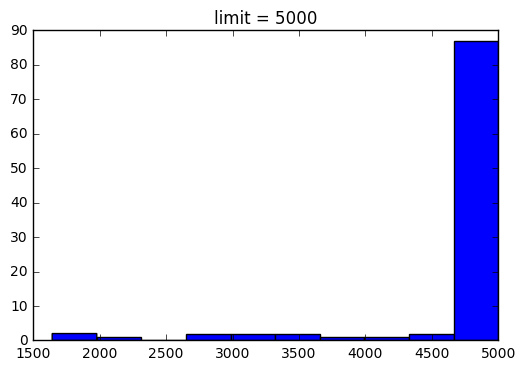

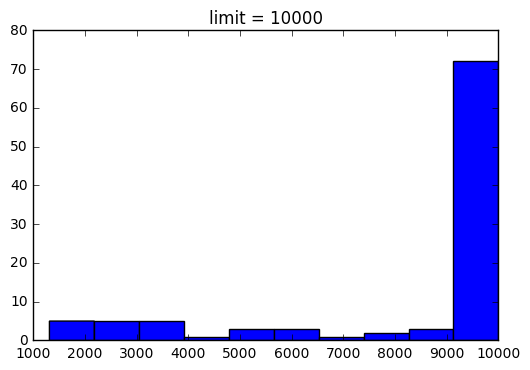

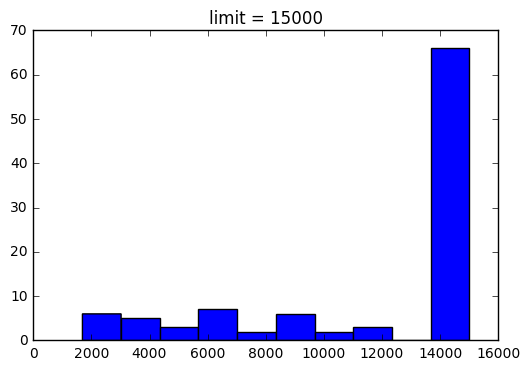

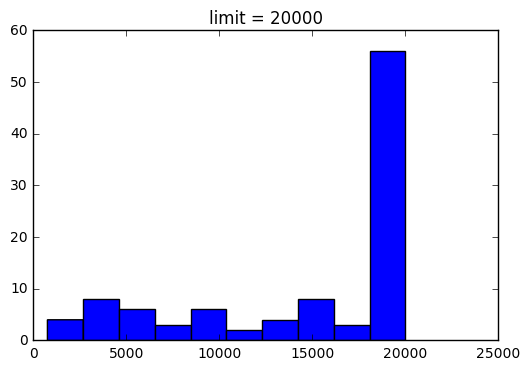

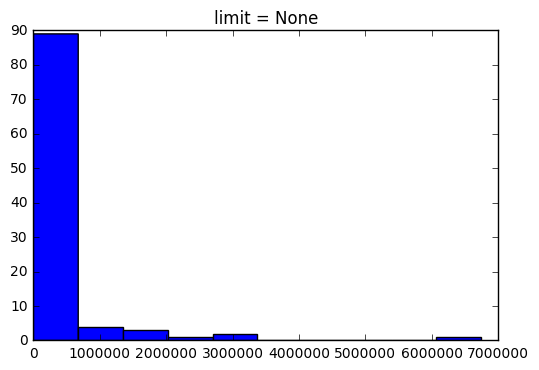

In [34]:
limits = [5000,10000,15000, 20000, None]
for lim in limits:
    plt.hist([gamblers_ruin(lim) for i in range(100)] )
    plt.title("limit = " + str(lim))
    plt.show()